In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

import hist
s = hist.tag.Slicer()

from coffea import util

In [2]:
sm_xs = 3.675

In [3]:
wc = 'cHj3'

In [4]:
rw = util.load("coffea/VBF_SMEFTsim_topU3l_NP1.coffea")

In [5]:
direct = util.load("coffea/VBF_SMEFTsim_topU3l_Direct_"+wc+".coffea")
linear = util.load("coffea/VBF_SMEFTsim_topU3l_Linear_"+wc+".coffea")
quad   = util.load("coffea/VBF_SMEFTsim_topU3l_Quad_"+wc+".coffea")

In [6]:
def plot_with_ratio(rwin, h1, h2, h3, rebin=1):
    fig, ax = plt.subplots(2,1,sharex=True)
    fig.subplots_adjust(hspace=0)
    
    var = h1.axes[0].name
    rw = rwin[{var:s[::hist.rebin(rebin)]}]
    direct = h1[{var:s[::hist.rebin(rebin)]}]
    
    lin = h2[{var:s[::hist.rebin(rebin)]}]
    quad = h3[{var:s[::hist.rebin(rebin)]}]
    
    # SM for linear and quad is dummy, there is only one weight
    samp = rw + lin + quad
    
               
    rw_norm = rw[{'wc':wc+'=1.0'}].values()#/rw[{'wc':wc+'=1.0',var:sum}].value
    rw_norm_err = np.sqrt(rw[{'wc':wc+'=1.0'}].variances())#/rw[{'wc':wc+'=1.0',var:sum}].value
    direct_norm = direct[{'wc':'SM'}].values()#/direct[{'wc':'SM',var:sum}].value
    direct_norm_err = np.sqrt(direct[{'wc':'SM'}].variances())#/direct[{'wc':'SM',var:sum}].value
    samp_norm = samp[{'wc':'SM'}].values()#/samp[{'wc':'SM',var:sum}].value
    samp_norm_err = np.sqrt(samp[{'wc':'SM'}].variances())#/samp[{'wc':'SM',var:sum}].value
    
    print(rw[{'wc':'SM',var:sum}].value*1e-6,lin[{'wc':'SM',var:sum}].value*1e-6,quad[{'wc':'SM',var:sum}].value*1e-6)
    print(direct[{'wc':'SM',var:sum}].value*0.5e-6,rw[{'wc':wc+'=1.0',var:sum}].value*1e-6,samp[{'wc':wc+'=1.0',var:sum}].value*1e-6)
    
    the_bins = rw[{'wc':'SM'}].axes[0].edges
    bin_centers = the_bins[:-1] + 0.5*np.diff(the_bins)
    
    ax[0].hist([the_bins[:-1],the_bins[:-1],the_bins[:-1]],
               bins=the_bins,
               weights=[
                        quad[{'wc':'SM'}].values(),#/samp[{'wc':'SM',var:sum}].value,
                        lin[{'wc':'SM'}].values(),#/samp[{'wc':'SM',var:sum}].value,
                        rw[{'wc':'SM'}].values(),#/samp[{'wc':'SM',var:sum}].value
               ],
               label=['Quadratic','Linear','SM'],
               stacked=True)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=samp_norm,
               label='SM + Lin + Quad',
               histtype='step',
               color='black'
               )        
    ax[0].errorbar(bin_centers, samp_norm, yerr=samp_norm_err, linestyle='',color='black')
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=direct_norm,
               label='Direct',
               histtype='step',color='#9467bd'
               )   
    ax[0].errorbar(bin_centers, direct_norm, yerr=direct_norm_err, linestyle='',color='#9467bd')
      
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=rw_norm,
               label='Reweighted',
               histtype='step',color='#d62728'
               )        
    ax[0].errorbar(bin_centers, rw_norm, yerr=rw_norm_err, linestyle='',color='#d62728')
                    
       
    # Ratio panel
    rw_rat = np.divide(rw_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
    rw_rat_err = np.divide(rw_norm_err,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
    direct_rat = np.divide(direct_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
    direct_rat_err = np.divide(direct_norm_err,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
    samp_rat = np.divide(samp_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
    samp_rat_err = np.divide(samp_norm_err,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=samp_rat,
               histtype='step',
               color='black'
               )        
    ax[1].errorbar(bin_centers, samp_rat, yerr=samp_rat_err, linestyle='',color='black')
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=direct_rat,
               histtype='step',color='#9467bd'
               )   
    ax[1].errorbar(bin_centers, direct_rat, yerr=direct_rat_err, linestyle='',color='#9467bd')
      
    
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=rw_rat,
               histtype='step',color='#d62728'
               )        
    ax[1].errorbar(bin_centers, rw_rat, yerr=rw_rat_err, linestyle='',color='#d62728')

    ax[0].set_ylabel('Events')
    #ax[0].set_ylim(-0.1,0.2)
    ax[0].set_yscale('log')
    ax[1].set_ylabel('Ratio to SM')
    ax[1].set_ylim(0.5,2)
    ax[1].set_xlabel(h1.axes[0].label)
    
    ax[1].plot([the_bins[0],the_bins[-1]],[1,1],color='gray',linestyle=":")
    
    fig.legend(frameon=False,bbox_to_anchor=(1.25,0.9),title=wc+'=1.0')
    fig.savefig("figures/"+wc+"/overlay_"+var+"_"+wc+".png",bbox_inches='tight')

In [7]:
def plot_var(var):
    h0 = rw[var]
    h1 = direct[var]
    h2 = linear[var]
    h3 = quad[var]

    plot_with_ratio(h0, h1, h2, h3, rebin=5)

In [8]:
direct.keys()

dict_keys(['q1pt', 'q2pt', 'hpt', 'detaqq', 'dphiqq', 'mqq', 'EventCount'])

3.6764326185092924 -1.516502419538498 0.641461004737854
1.3992402580878733 2.781124714228652 2.781124714228652


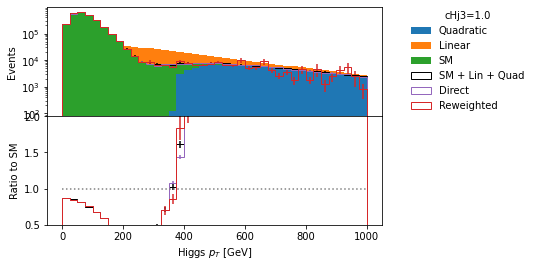

In [9]:
plot_var('hpt')

3.6764326185092924 -1.516502419538498 0.641461004737854
1.3992402580878733 2.781124714228651 2.781124714228651


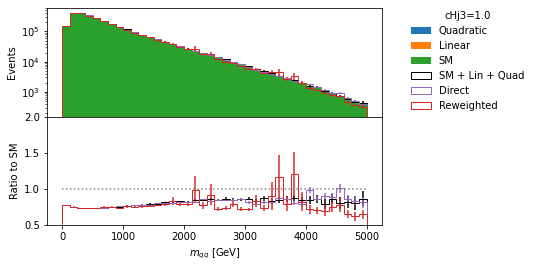

In [10]:
plot_var('mqq')

3.6764326185092924 -1.516502419538498 0.641461004737854
1.3992402580878733 2.7811247142286533 2.7811247142286533


/tmp/ipykernel_27397/2725693762.py:66: RuntimeWarning: invalid value encountered in true_divide
  rw_rat = np.divide(rw_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:67: RuntimeWarning: invalid value encountered in true_divide
  rw_rat_err = np.divide(rw_norm_err,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:68: RuntimeWarning: divide by zero encountered in true_divide
  direct_rat = np.divide(direct_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:69: RuntimeWarning: divide by zero encountered in true_divide
  direct_rat_err = np.divide(direct_norm_err,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:70: RuntimeWarning: divide by zero encountered in true_divide
  samp_rat = np.divide(samp_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:71: RuntimeWarni

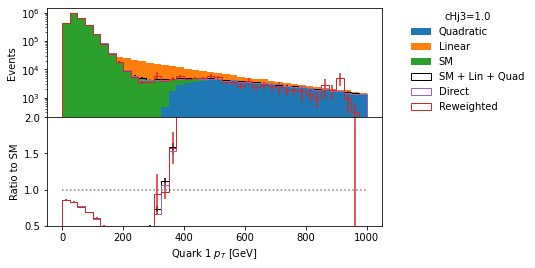

In [11]:
plot_var('q1pt')

3.6764326185092924 -1.516502419538498 0.641461004737854
1.3992402580878733 2.7811247142286506 2.7811247142286506


/tmp/ipykernel_27397/2725693762.py:66: RuntimeWarning: invalid value encountered in true_divide
  rw_rat = np.divide(rw_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:67: RuntimeWarning: invalid value encountered in true_divide
  rw_rat_err = np.divide(rw_norm_err,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:68: RuntimeWarning: divide by zero encountered in true_divide
  direct_rat = np.divide(direct_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:69: RuntimeWarning: divide by zero encountered in true_divide
  direct_rat_err = np.divide(direct_norm_err,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:70: RuntimeWarning: divide by zero encountered in true_divide
  samp_rat = np.divide(samp_norm,rw[{'wc':'SM'}].values())#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_27397/2725693762.py:71: RuntimeWarni

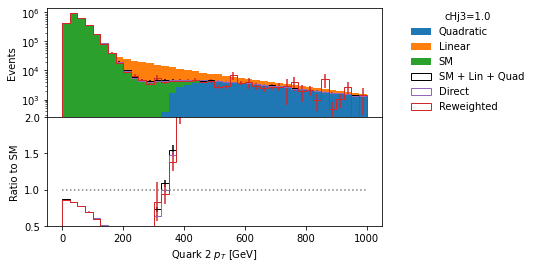

In [12]:
plot_var('q2pt')

3.6764326185092924 -1.516502419538498 0.641461004737854
1.3992402580878733 2.7811247142286515 2.7811247142286515


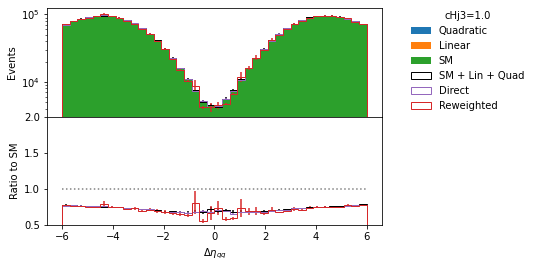

In [13]:
plot_var('detaqq')

3.6764326185092924 -1.516502419538498 0.641461004737854
1.3992402580878733 2.781124714228652 2.781124714228652


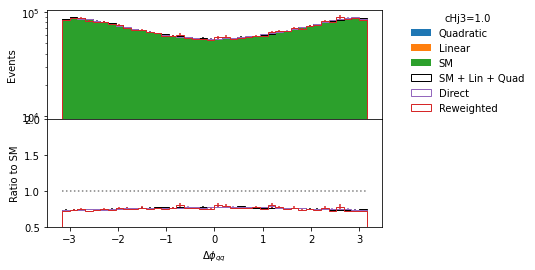

In [14]:
plot_var('dphiqq')